In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

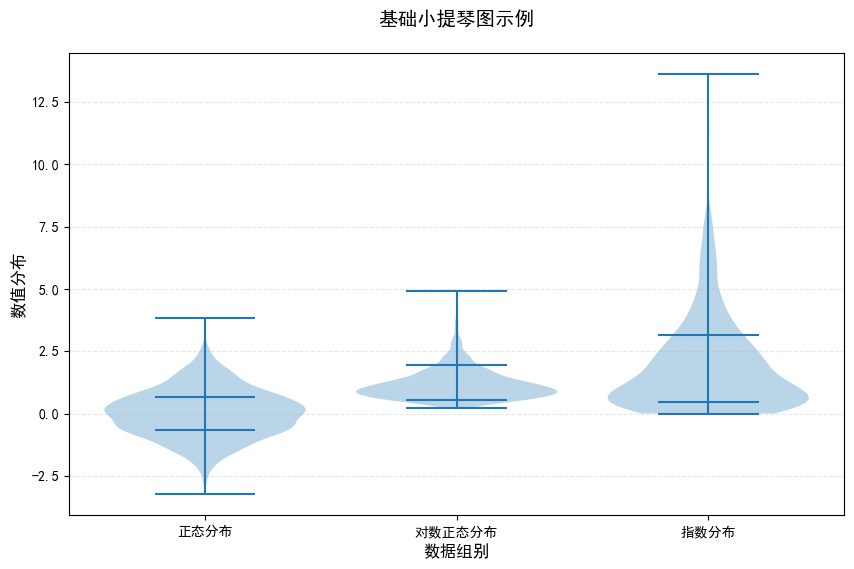

In [3]:
# 生成模拟数据（3组不同分布的数据）
np.random.seed(42) 
data = [
    np.random.normal(loc=0, scale=1, size=1000),  # 正态分布（均值0，标准差1）
    np.random.lognormal(mean=0, sigma=0.5, size=1000),  # 对数正态分布
    np.random.exponential(scale=2, size=1000)  # 指数分布（scale=1/λ）
]

plt.figure(figsize=(10, 6), dpi=100)

# 绘制基础小提琴图
violin_parts = plt.violinplot(
                        data,  # 输入数据（3组数据的列表）
                        positions=[1, 2, 3],  # 指定小提琴图在x轴上的位置（分别对应1、2、3坐标）
                        vert=True,  # 垂直方向显示小提琴图
                        widths=0.8,  # 小提琴图的宽度
                        showmeans=False,  # 不显示均值标记
                        showextrema=True,  # 显示极值（最大值和最小值，以短线标记）
                        showmedians=False,  # 不显示中位数
                        # 为每组数据指定显示的分位数（第一组：25%和75%分位；第二组：10%和90%分位；第三组：20%和80%分位）
                        quantiles=[[0.25, 0.75], [0.1, 0.9], [0.2, 0.8]],  
                        points=200,  # 核密度估计的采样点数
                        bw_method='scott',  # 带宽计算方法（'scott'为经典方法，控制曲线平滑程度）
                             )


plt.xlabel('数据组别', fontsize=12)
plt.ylabel('数值分布', fontsize=12)
plt.title('基础小提琴图示例', fontsize=14, pad=20)
# 设置x轴刻度标签（默认是1、2、3，替换为更易理解的名称）
plt.xticks(ticks=[1, 2, 3], labels=['正态分布', '对数正态分布', '指数分布'])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()

# 2、使用示例：

### 示例 1：对比箱线图与小提琴图

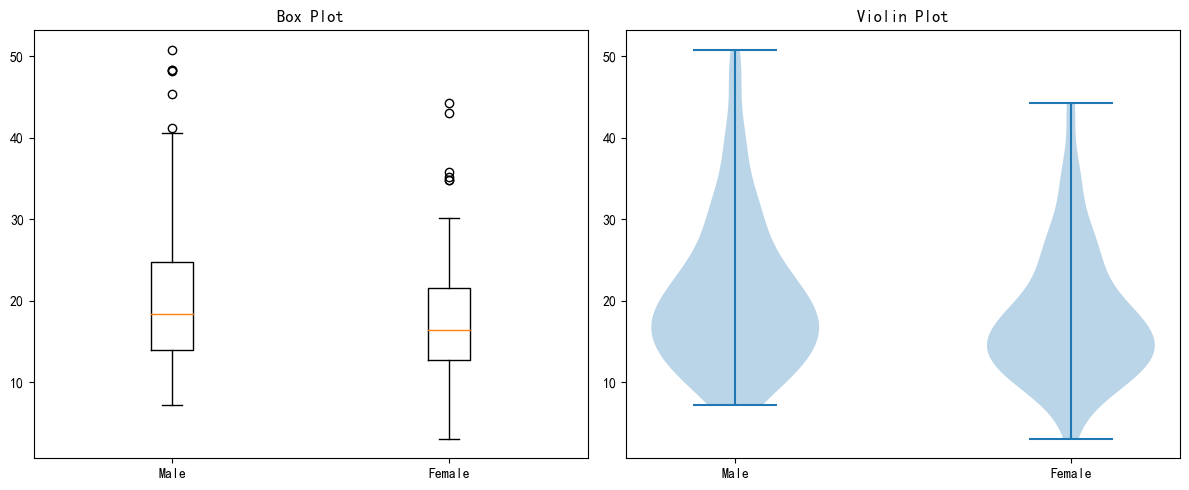

In [4]:
import seaborn as sns

# 使用 Seaborn 加载示例数据
tips = sns.load_dataset("tips")

# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 箱线图
axes[0].boxplot([tips[tips['sex'] == 'Male']['total_bill'],
                 tips[tips['sex'] == 'Female']['total_bill']],
                labels=['Male', 'Female'])
axes[0].set_title('Box Plot')

# 小提琴图
axes[1].violinplot([tips[tips['sex'] == 'Male']['total_bill'],
                    tips[tips['sex'] == 'Female']['total_bill']],
                   positions=[1, 2])
axes[1].set_xticks([1, 2])
axes[1].set_xticklabels(['Male', 'Female'])
axes[1].set_title('Violin Plot')

plt.tight_layout()
plt.show()

### 示例2：通过返回值自定义样式

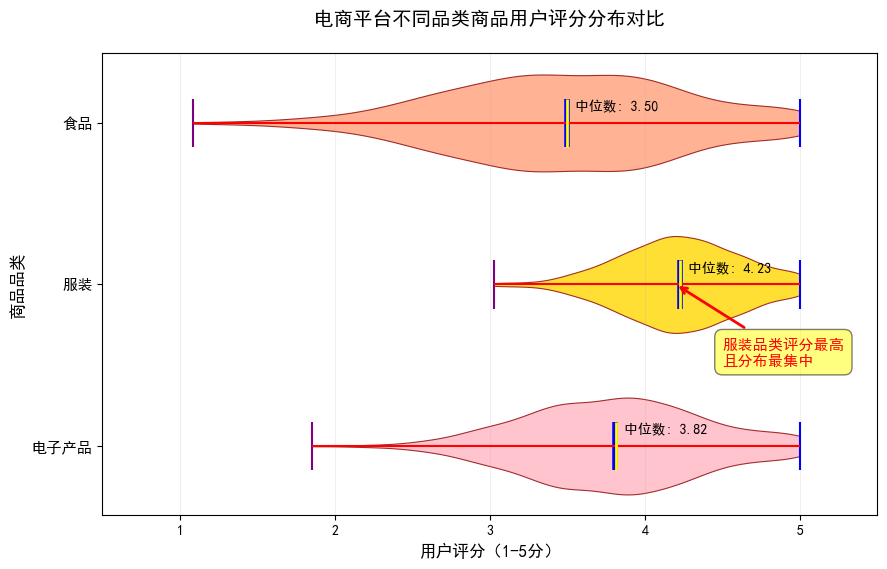

In [5]:
import pandas as pd

# 生成模拟数据：模拟电商平台不同品类商品的用户评分（1-5分）
np.random.seed(42)
df = pd.DataFrame({
    '电子产品': np.random.normal(loc=3.8, scale=0.6, size=1000).clip(1, 5),  # 均值3.8，限制1-5分
    '服装': np.random.normal(loc=4.2, scale=0.4, size=1000).clip(1, 5),  # 均值4.2，更集中
    '食品': np.random.normal(loc=3.5, scale=0.8, size=1000).clip(1, 5)  # 均值3.5，更分散
})
data = [df['电子产品'], df['服装'], df['食品']]

plt.figure(figsize=(10, 6), dpi=100)

# 绘制横向小提琴图，返回包含图表各组件的字典
violin_parts = plt.violinplot(
    data,
    vert=False,  # 横向显示
    showmeans=True,
    showmedians=True,
    showextrema=True,
    positions=[1, 2, 3],
    widths=0.6
)

# =============美化设置：自定义小提琴图的视觉样式====================
# 设置每个小提琴的填充色与边框样式
colors = ['#FFB6C1', '#FFD700', '#FFA07A']  # 浅粉、金色、浅橙
# 遍历每个小提琴的填充区域（bodies为PolyCollection实例列表）
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.8)
    pc.set_edgecolor('darkred')
    pc.set_linewidth(0.8)

# 自定义均值线、中位数线、极值线的样式
violin_parts['cmeans'].set_color('blue')        # 设置均值线颜色
violin_parts['cmeans'].set_linewidth(4)         # 设置均值线宽度
violin_parts['cmedians'].set_color('yellow')    # 设置中位数线颜色
violin_parts['cmedians'].set_linewidth(2)       # 设置中位数线宽度
violin_parts['cbars'].set_color('red')          # 设置中线（分布中心）颜色
violin_parts['cmins'].set_color('purple')       # 设置最小值线颜色
violin_parts['cmaxes'].set_color('blue')        # 设置最大值线颜色

# 添加中位数数值标签
medians = [np.median(group) for group in data]
for i, median in enumerate(medians):
    plt.text(
        median + 0.05,  # 文字x坐标（中位数右侧0.05）
        i + 1.1,  # 文字y坐标（对应品类位置）
        f'中位数: {median:.2f}',  # 文字内容（保留2位小数）
        fontsize=10,
        color='black',
        va='center'  # 垂直居中对齐
    )

# 添加结论标注
plt.annotate(
    '服装品类评分最高\n且分布最集中',  # 标注内容
    xy=(4.2, 2),  # 箭头指向的位置（服装品类的均值附近）
    xytext=(4.5, 1.5),  # 文字位置
    arrowprops=dict(arrowstyle='->', color='red', lw=2),  # 箭头样式
    fontsize=11,
    color='red',
    fontweight='bold',
    bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.5)  # 文字背景框
)


plt.ylabel('商品品类', fontsize=12, fontweight='bold')
plt.xlabel('用户评分（1-5分）', fontsize=12, fontweight='bold')
plt.title('电商平台不同品类商品用户评分分布对比', fontsize=14, fontweight='bold', pad=20)
plt.yticks(ticks=[1, 2, 3], labels=['电子产品', '服装', '食品'], fontsize=11)
plt.xlim(0.5, 5.5)  # 调整x轴范围，避免标注被截断
plt.grid(axis='x', alpha=0.2, linestyle='-')
plt.show()